In [311]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [312]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/7_FINAL_CLEAN.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.5
4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# CATEGORICAL COLUMNS

In [313]:
df.select_dtypes(include="O")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,Y,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Other
...,...,...,...,...,...,...,...,...,...,...
307287,Cash loans,M,N,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services
307288,Cash loans,F,Y,Pensioner,Secondary / secondary special,Widow,House / apartment,Cleaning staff,MONDAY,XNA
307289,Cash loans,F,Y,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School
307290,Cash loans,F,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1


In [314]:
df.select_dtypes(include="O").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

10.  Object columns in the dataset


* <small> NAME_CONTRACT_TYPE
*  CODE_GENDER
*  FLAG_OWN_REALTY
*  NAME_INCOME_TYPE
*  NAME_EDUCATION_TYPE
*  NAME_FAMILY_STATUS
*  NAME_HOUSING_TYPE
*  OCCUPATION_TYPE
*  WEEKDAY_APPR_PROCESS_START
*  ORGANIZATION_TYPE

## 1. NAME_CONTRACT_TYPE

In [315]:
df["NAME_CONTRACT_TYPE"].value_counts()*100/df.shape[0]

Cash loans         90.485271
Revolving loans     9.514729
Name: NAME_CONTRACT_TYPE, dtype: float64

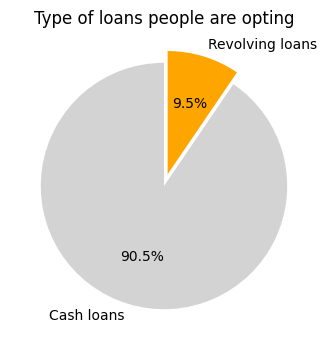

In [316]:
value_counts = df["NAME_CONTRACT_TYPE"].value_counts()
explode = [0, 0.1]
# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',explode=explode ,startangle=90, colors=['lightgrey', 'orange'])
plt.title('Type of loans people are opting')
plt.show()

*

* almost 90% of people are opting for Cash loans
* NO outliers are present


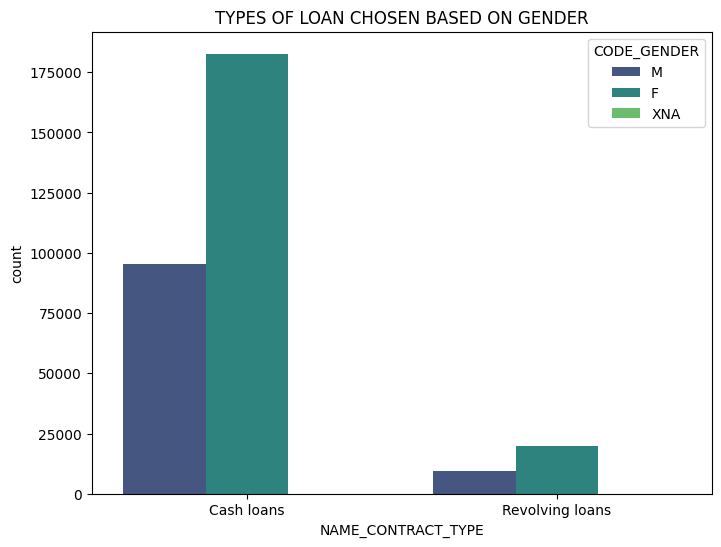

In [317]:
plt.figure(figsize=(8, 6))
sns.countplot(x="NAME_CONTRACT_TYPE", hue='CODE_GENDER', data=df, palette='viridis')
plt.title('TYPES OF LOAN CHOSEN BASED ON GENDER')
plt.show()

<b> WAIT what is that XNA ?? </b>

* When I done base model, I found XNA in multiple categorical columns
* Both the cases Females are preferring to opt for loans compared to males
* based on value_counts

In [318]:
# ENCODING USING LABEL ENCODING,NO OUTILERS ARE PRESENT

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

df["NAME_CONTRACT_TYPE"]=label_encoder.fit_transform(df["NAME_CONTRACT_TYPE"])

## 2. CODE_GENDER

In [319]:
df["CODE_GENDER"].value_counts()

F      202317
M      104971
XNA         4
Name: CODE_GENDER, dtype: int64

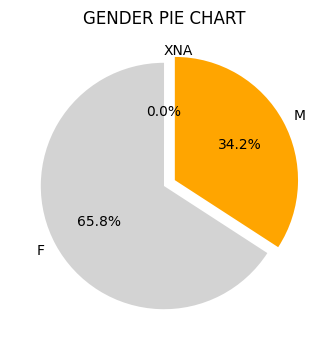

In [320]:
value_counts = df["CODE_GENDER"].value_counts()
explode = [0, 0.1,0]
# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',explode=explode ,startangle=90, colors=['lightgrey', 'orange',"red"])
plt.title('GENDER PIE CHART')
plt.show()

* 1/3rd of PEOPLE applied are only males
* 4 values out of total are only XNA  
* before cleaning also there were no NULL values in the columns
* In the context of credit or financial datasets, finding "XNA" typically refers to a code or label used to represent "Not Applicable" or "Not Available." It's a common practice in data preprocessing to replace missing or undefined values with a placeholder like "XNA" to indicate that the information is not applicable or not provided.
* This missing value is MAR , the applicant is not ready to reveal the gender
* replacing this value the mode

In [321]:
df["CODE_GENDER"]=df["CODE_GENDER"].replace("XNA",df["CODE_GENDER"].mode()[0])

In [322]:
df["CODE_GENDER"].value_counts()

F    202321
M    104971
Name: CODE_GENDER, dtype: int64

In [323]:
# label encoding Gender columns
df["CODE_GENDER"]=label_encoder.fit_transform(df["CODE_GENDER"])
df["CODE_GENDER"].value_counts()

0    202321
1    104971
Name: CODE_GENDER, dtype: int64

## FLAG_OWN_REALTY

In [324]:
df["FLAG_OWN_REALTY"].value_counts()

Y    213160
N     94132
Name: FLAG_OWN_REALTY, dtype: int64

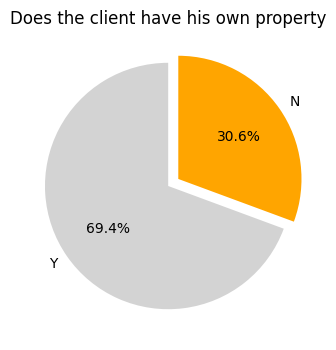

In [325]:
value_counts = df["FLAG_OWN_REALTY"].value_counts()
explode = [0, 0.1]
# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',explode=explode ,startangle=90, colors=['lightgrey', 'orange'])
plt.title('Does the client have his own property')
plt.show()

* Almost 70 % of people wons the property
* only two category
* No outliers are present
* Label encoding preffered

In [326]:
df["FLAG_OWN_REALTY"]=label_encoder.fit_transform(df["FLAG_OWN_REALTY"])

## NAME_INCOME_TYPE

In [327]:
value_counts=df["NAME_INCOME_TYPE"].value_counts()*100/df.shape[0]
value_counts

Working                 51.645341
Commercial associate    23.291853
Pensioner               18.007628
State servant            7.055179
Name: NAME_INCOME_TYPE, dtype: float64

<ipython-input-328-d63fdfd2ad03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,y=value_counts.values, palette=custom_palette)


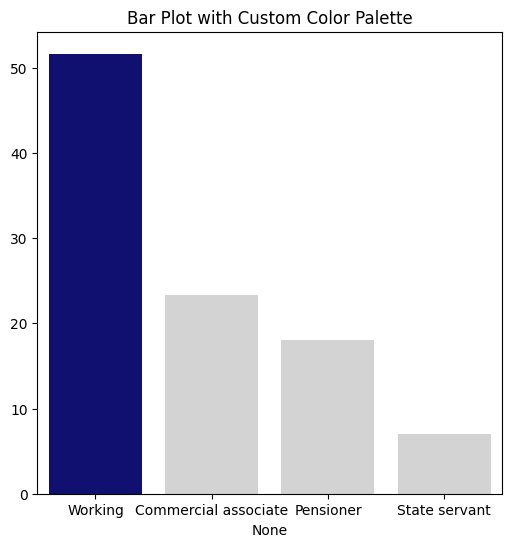

In [328]:
plt.figure(figsize=(6, 6))
custom_palette = ["navy", "lightgrey", "lightgrey", "lightgrey"]
sns.barplot(x=value_counts.index,y=value_counts.values, palette=custom_palette)
plt.title('Bar Plot with Custom Color Palette')
plt.show()

In [329]:
df["NAME_INCOME_TYPE"]=label_encoder.fit_transform(df["NAME_INCOME_TYPE"])

In [330]:
df["NAME_INCOME_TYPE"].value_counts()/df.shape[0]

3    0.516453
0    0.232919
1    0.180076
2    0.070552
Name: NAME_INCOME_TYPE, dtype: float64

## NAME_EDUCATION_TYPE

In [331]:
value_counts=df["NAME_EDUCATION_TYPE"].value_counts()
value_counts

Secondary / secondary special    218365
Higher education                  74838
Incomplete higher                 10273
Lower secondary                    3816
Name: NAME_EDUCATION_TYPE, dtype: int64

<ipython-input-332-37834f4d4907>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=value_counts.index,x=value_counts.values, palette=custom_palette)


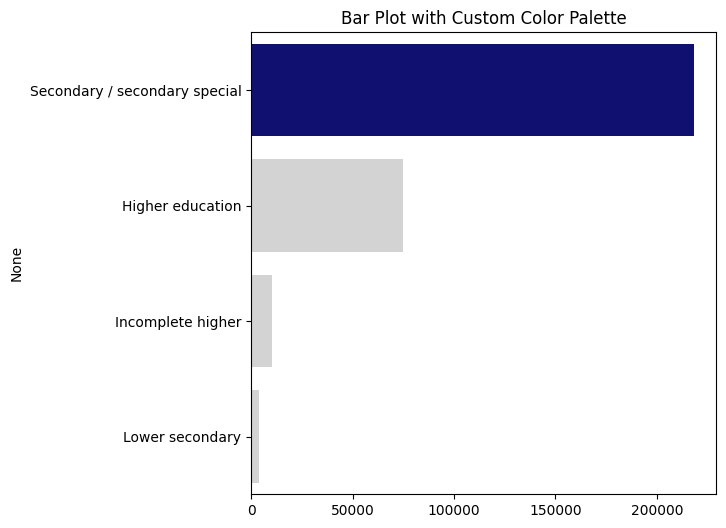

In [332]:
plt.figure(figsize=(6, 6))
custom_palette = ["navy", "lightgrey", "lightgrey", "lightgrey"]
sns.barplot(y=value_counts.index,x=value_counts.values, palette=custom_palette)
plt.title('Bar Plot with Custom Color Palette')
plt.show()

In [333]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder(categories=[["Lower secondary","Secondary / secondary special","Incomplete higher","Higher education"]])
df["NAME_EDUCATION_TYPE"]=ordinal_encoder.fit_transform(df[["NAME_EDUCATION_TYPE"]])

## NAME_FAMILY_STATUS

In [334]:
value_counts=df["NAME_FAMILY_STATUS"].value_counts()
value_counts

Married                 196295
Single / not married     45404
Civil marriage           29759
Separated                19752
Widow                    16080
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [335]:
df[df["NAME_FAMILY_STATUS"]=="Unknown"]["DAYS_BIRTH"]/365

41955     33.961644
187214    35.189041
Name: DAYS_BIRTH, dtype: float64

* This might be reason for Seperated at very young age.
* their age is also in the range 30 -35
* Since I have replaced with FEMALES its not belong to LGBTQ
* BOTH ARE MALES
* imputing with Divorced

In [336]:
df["NAME_FAMILY_STATUS"]=df["NAME_FAMILY_STATUS"].replace("Unknown","Separated")

In [337]:
df["NAME_FAMILY_STATUS"]=label_encoder.fit_transform(df["NAME_FAMILY_STATUS"])

## NAME_HOUSING_TYPE

In [338]:
df["NAME_HOUSING_TYPE"].value_counts()/df.shape[0]

House / apartment      0.887351
With parents           0.048264
Municipal apartment    0.036386
Rented apartment       0.015855
Office apartment       0.008500
Co-op apartment        0.003645
Name: NAME_HOUSING_TYPE, dtype: float64

In [339]:
to_be_replaced=["Municipal apartment","Rented apartment","Office apartment","Co-op apartment"]

df["NAME_HOUSING_TYPE"]=df["NAME_HOUSING_TYPE"].replace(to_be_replaced,"rented and other cases")

In [340]:
df["NAME_HOUSING_TYPE"].value_counts()/df.shape[0]

House / apartment         0.887351
rented and other cases    0.064385
With parents              0.048264
Name: NAME_HOUSING_TYPE, dtype: float64

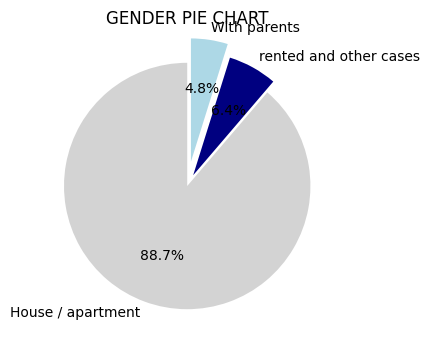

In [341]:
value_counts = df["NAME_HOUSING_TYPE"].value_counts()
explode = [0, 0.1,0.2]
# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',explode=explode ,startangle=90, colors=['lightgrey', 'navy',"lightblue"])
plt.title('GENDER PIE CHART')
plt.show()

In [369]:
df["NAME_HOUSING_TYPE"]=label_encoder.fit_transform(df["NAME_HOUSING_TYPE"])

## OCCUPATION_TYPE

In [342]:
value_counts=df.OCCUPATION_TYPE.value_counts()
value_counts

Laborers                 75769
Cleaning staff           42824
Core staff               37099
Sales staff              37070
Managers                 27429
Drivers                  21930
High skill tech staff    14801
Accountants              12617
Medicine staff           11265
Security staff            8631
Cooking staff             7042
Private service staff     3017
Low-skill Laborers        2430
Waiters/barmen staff      1604
Secretaries               1577
Realty agents              859
HR staff                   677
IT staff                   651
Name: OCCUPATION_TYPE, dtype: int64

<ipython-input-343-96fd66d9eda0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=value_counts.index,x=value_counts.values, palette="viridis")


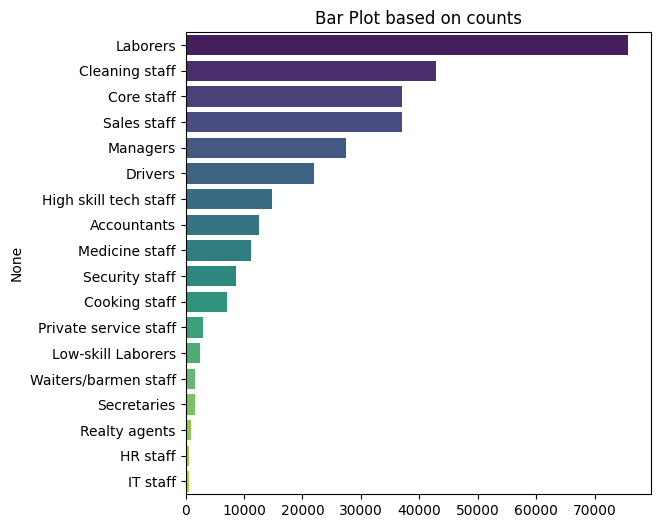

In [343]:
plt.figure(figsize=(6, 6))
custom_palette = ["navy", "lightgrey", "lightgrey", "lightgrey"]
sns.barplot(y=value_counts.index,x=value_counts.values, palette="viridis")
plt.title('Bar Plot based on counts')
plt.show()

* There is no particular order, so label encoding is preffered

In [344]:
df["OCCUPATION_TYPE1"]=label_encoder.fit_transform(df["OCCUPATION_TYPE"])

## WEEKDAY_APPR_PROCESS_START

<ipython-input-345-c1ff4b93a070>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=value_counts.index,x=value_counts.values, palette="viridis")


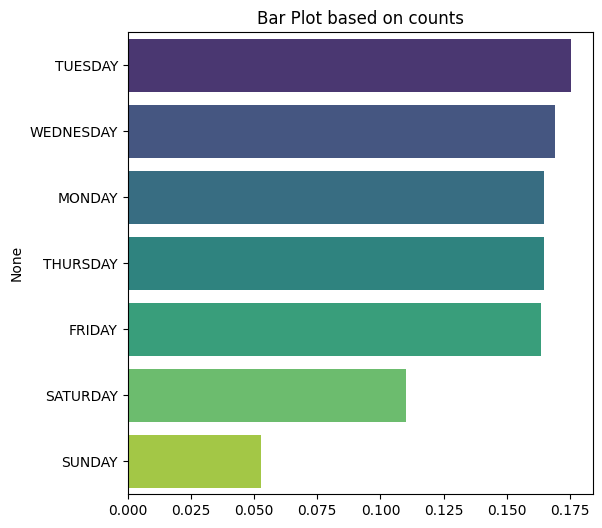

In [345]:
value_counts=df["WEEKDAY_APPR_PROCESS_START"].value_counts()/df.shape[0]

plt.figure(figsize=(6, 6))
custom_palette = ["navy", "lightgrey", "lightgrey", "lightgrey"]
sns.barplot(y=value_counts.index,x=value_counts.values, palette="viridis")
plt.title('Bar Plot based on counts')
plt.show()

* SATURDAY and Sunday count is less compared to other days
* maybe due to holidays

In [346]:
df["WEEKDAY_APPR_PROCESS_START"].value_counts()

TUESDAY      53845
WEDNESDAY    51902
MONDAY       50674
THURSDAY     50562
FRIDAY       50304
SATURDAY     33832
SUNDAY       16173
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [347]:
ordinal_encoder=OrdinalEncoder(categories=[["SUNDAY","MONDAY","TUESDAY","WEDNESDAY","THURSDAY","FRIDAY","SATURDAY"]])
df["WEEKDAY_APPR_PROCESS_START"]=ordinal_encoder.fit_transform(df[["WEEKDAY_APPR_PROCESS_START"]])

# ORGANIZATION_TYPE

In [348]:
df["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67947
XNA                       55326
Self-employed             38398
Other                     17175
Medicine                  11188
Business Entity Type 2    10550
Government                10400
School                     8887
Trade: type 7              7827
Kindergarten               6879
Construction               6721
Business Entity Type 1     5975
Transport: type 4          5395
Trade: type 3              3490
Industry: type 9           3368
Industry: type 3           3277
Security                   3245
Housing                    2957
Industry: type 11          2702
Military                   2632
Bank                       2501
Agriculture                2453
Police                     2337
Transport: type 2          2202
Postal                     2156
Security Ministries        1969
Trade: type 2              1900
Restaurant                 1810
Services                   1574
University                 1311
Industry: type 7           1307
Transpor

In [349]:
df[df["ORGANIZATION_TYPE"]=="XNA"]["NAME_INCOME_TYPE"].value_counts()

1    55326
Name: NAME_INCOME_TYPE, dtype: int64

In [350]:
(df[df["ORGANIZATION_TYPE"]=="XNA"]["DAYS_BIRTH"]/365).mode()

0    63.136986
Name: DAYS_BIRTH, dtype: float64

In [351]:
(df[df["ORGANIZATION_TYPE"]=="XNA"]["DAYS_BIRTH"]/365).max()

69.12054794520547

In [352]:
(df[df["ORGANIZATION_TYPE"]=="XNA"]["DAYS_BIRTH"]/365).min()

21.07123287671233

<ipython-input-353-13c9a9f2a980>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[df["ORGANIZATION_TYPE"]=="XNA"]["DAYS_BIRTH"]/365))


<Axes: xlabel='DAYS_BIRTH', ylabel='Density'>

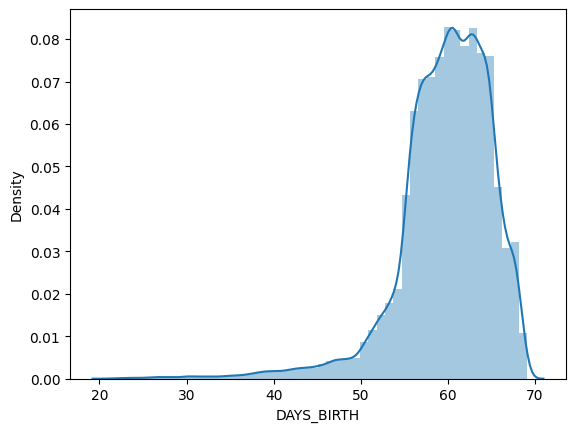

In [353]:
sns.distplot((df[df["ORGANIZATION_TYPE"]=="XNA"]["DAYS_BIRTH"]/365))

In [354]:
filtered_df=df[df["ORGANIZATION_TYPE"]=="XNA"]

In [355]:
under_retirement_age_df=filtered_df[filtered_df["DAYS_BIRTH"]/365<55]

* Most of these people are not ready to reveal their jobs
* their income type is *pensioner*
* 48572 are above retirement age
* 6746 are under retirement age

* Most of their age group is in the range of 60s
* So this NMAR missing values
* They are not ready to reveal their organization type
* I am replacing it with Retired



* under retirement age people are doing jobs but still their income type is mentioned as retiremt fund

* these 6000 people's primary source of income might be pension,
either that individual's one family member might be a retired one

### UNDER RETIREMENT AGE

In [356]:
under_retirement_age_df["OCCUPATION_TYPE"].value_counts().index

Index(['Cleaning staff', 'Laborers', 'Core staff', 'Managers',
       'Medicine staff', 'High skill tech staff', 'Security staff',
       'Accountants', 'Sales staff'],
      dtype='object')

In [357]:
# IMPUTING missing values based on thier jobs
# if OCCUPATION_TYPE is "security staff"
# and ["DAYS_BIRTH"]/365 < 55
# replace ORGANIZATION_TYPE="Security"

condition_column1 = df['OCCUPATION_TYPE']=="Security staff"
condition_column2 = df["DAYS_BIRTH"]/365 < 55
condition_column3 = df["ORGANIZATION_TYPE"]=="XNA"

#df["ORGANIZATION_TYPE"]=df.replace("XNA","Security")
df.loc[condition_column1 & condition_column2 & condition_column3, 'XNA'] = 'Security'

In [358]:
# HERE I am doing an assumptions that highly skilled tech staff belong to industry type1

condition_column1 = df['OCCUPATION_TYPE']=="High skill tech staff"
condition_column2 = df["DAYS_BIRTH"]/365 < 55
condition_column3 = df["ORGANIZATION_TYPE"]=="XNA"

#df["ORGANIZATION_TYPE"]=df.replace("XNA","Security")
df.loc[condition_column1 & condition_column2 & condition_column3, 'XNA'] = 'Industry: type 1'

In [359]:
# HERE I am doing an assumptions that highly skilled tech staff belong to industry type1

condition_column1 = df['OCCUPATION_TYPE']=="Cleaning staff"
condition_column2 = df["DAYS_BIRTH"]/365 < 55
condition_column3 = df["ORGANIZATION_TYPE"]=="XNA"

#df["ORGANIZATION_TYPE"]=df.replace("XNA","Security")
df.loc[condition_column1 & condition_column2 & condition_column3, 'XNA'] = 'Other'

In [360]:
df["ORGANIZATION_TYPE"]=df["ORGANIZATION_TYPE"].replace("XNA","Retired people")

### OVER RETIREMENT AGE

In [361]:
over_retirement_age_df=filtered_df[filtered_df["DAYS_BIRTH"]/365>55]

In [362]:
over_retirement_age_df["OCCUPATION_TYPE"].value_counts()

Cleaning staff           33124
Laborers                  6827
Core staff                4419
Managers                  1126
Medicine staff            1083
High skill tech staff      824
Security staff             665
Accountants                492
Sales staff                  9
Drivers                      3
Name: OCCUPATION_TYPE, dtype: int64

In [363]:
df[df["NAME_INCOME_TYPE"]==1]["ORGANIZATION_TYPE"].value_counts()

Retired people            55326
Business Entity Type 3        3
Business Entity Type 2        1
Industry: type 9              1
Medicine                      1
Military                      1
Trade: type 7                 1
Self-employed                 1
School                        1
Name: ORGANIZATION_TYPE, dtype: int64

In [364]:
df["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67947
Retired people            55326
Self-employed             38398
Other                     17175
Medicine                  11188
Business Entity Type 2    10550
Government                10400
School                     8887
Trade: type 7              7827
Kindergarten               6879
Construction               6721
Business Entity Type 1     5975
Transport: type 4          5395
Trade: type 3              3490
Industry: type 9           3368
Industry: type 3           3277
Security                   3245
Housing                    2957
Industry: type 11          2702
Military                   2632
Bank                       2501
Agriculture                2453
Police                     2337
Transport: type 2          2202
Postal                     2156
Security Ministries        1969
Trade: type 2              1900
Restaurant                 1810
Services                   1574
University                 1311
Industry: type 7           1307
Transpor

In [365]:
df.select_dtypes(include="O")

,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,XNA
0,House / apartment,Laborers,Business Entity Type 3,NaN
1,House / apartment,Core staff,School,NaN
2,House / apartment,Laborers,Government,NaN
3,House / apartment,Laborers,Business Entity Type 3,NaN
4,House / apartment,Core staff,Other,NaN
...,...,...,...,...
307287,With parents,Sales staff,Services,NaN
307288,House / apartment,Cleaning staff,Retired people,NaN
307289,House / apartment,Managers,School,NaN
307290,House / apartment,Laborers,Business Entity Type 1,NaN


In [366]:
df.drop("XNA",axis=1,inplace=True)

# anything to handle

In [373]:
df["ORGANIZATION_TYPE"]=label_encoder.fit_transform(df["ORGANIZATION_TYPE"])

In [371]:
df.drop("OCCUPATION_TYPE",axis=1,inplace=True)

In [374]:
df.select_dtypes(include="O")

""
0
1
2
3
4
...
307287
307288
307289
307290
